<a href="https://colab.research.google.com/github/NiinoKazuki/study_python/blob/master/competition2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
%cd "/content/drive/MyDrive/ColabNotebooks"

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks


In [ ]:
# データの読み込み
# INPUT_DIRにtrain.csvなどのデータを置いているディレクトリを指定してください。
INPUT_DIR = "/content/drive/MyDrive/ColabNotebooks/GCI_2022_Summer/Competitions/competition_2/input"

train = pd.read_csv( "/content/drive/MyDrive/ColabNotebooks/GCI_2022_Summer/Competitions/competition_2/input/train.csv")
test = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/GCI_2022_Summer/Competitions/competition_2/input/test.csv")
sample_sub = pd.read_csv( "/content/drive/MyDrive/ColabNotebooks/GCI_2022_Summer/Competitions/competition_2/input/sample_submission.csv")

In [ ]:
# trainデータの確認
print(f"train shape: {train.shape}")
train.head(3)

train shape: (171202, 51)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,...,NaN,0.0,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN
1,1,0,Cash loans,F,N,Y,0,225000.0,585000.0,16893.0,...,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0
2,2,0,Cash loans,F,N,Y,0,54000.0,334152.0,18256.5,...,NaN,4.0,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN


In [ ]:
# testデータの確認
print(f"test shape: {test.shape}")
test.head(3)

test shape: (61500, 50)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,171202,Cash loans,F,N,N,1,144000.0,961146.0,28233.0,688500.0,...,NaN,2.0,0.0,2.0,0.0,-1.0,NaN,NaN,NaN,NaN
1,171203,Cash loans,F,N,N,0,103500.0,296280.0,16069.5,225000.0,...,NaN,5.0,0.0,5.0,0.0,-212.0,NaN,NaN,NaN,NaN
2,171204,Cash loans,F,N,Y,1,180000.0,183694.5,11236.5,139500.0,...,0.389339,7.0,0.0,7.0,0.0,-428.0,0.0,1.0,1.0,1.0


In [ ]:
use_features = ["NAME_CONTRACT_TYPE", "AMT_INCOME_TOTAL", "EXT_SOURCE_2", "OWN_CAR_AGE", "ORGANIZATION_TYPE","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]
target = train["TARGET"].values

train = train[use_features]
train["TARGET"] = target
test = test[use_features]

In [ ]:
# trainデータの確認
print(f"train shape: {train.shape}")
train.head(3)

train shape: (171202, 9)


,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET
0,Cash loans,112500.0,0.372591,NaN,School,755190.0,36328.5,675000.0,0
1,Cash loans,225000.0,0.449567,NaN,XNA,585000.0,16893.0,585000.0,0
2,Cash loans,54000.0,0.569503,NaN,Postal,334152.0,18256.5,270000.0,0


In [ ]:
# testデータの確認
print(f"test shape: {test.shape}")
test.head(3)

test shape: (61500, 8)


,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,Cash loans,144000.0,0.720416,NaN,Kindergarten,961146.0,28233.0,688500.0
1,Cash loans,103500.0,0.287306,NaN,School,296280.0,16069.5,225000.0
2,Cash loans,180000.0,0.352456,NaN,Trade: type 7,183694.5,11236.5,139500.0


In [ ]:
# trainの欠損値を確認
train.isnull().sum()

NAME_CONTRACT_TYPE         0
AMT_INCOME_TOTAL           0
EXT_SOURCE_2             369
OWN_CAR_AGE           112992
ORGANIZATION_TYPE          0
AMT_CREDIT                 0
AMT_ANNUITY                6
AMT_GOODS_PRICE          163
TARGET                     0
dtype: int64

In [ ]:
# testの欠損値を確認
test.isnull().sum()

NAME_CONTRACT_TYPE        0
AMT_INCOME_TOTAL          0
EXT_SOURCE_2            130
OWN_CAR_AGE           40909
ORGANIZATION_TYPE         0
AMT_CREDIT                0
AMT_ANNUITY               3
AMT_GOODS_PRICE          53
dtype: int64

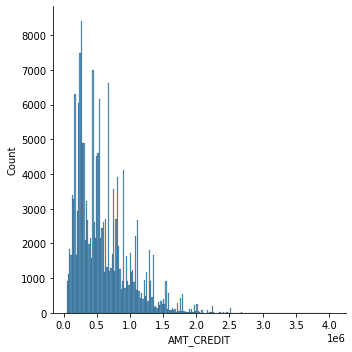

In [ ]:
# AMT_CREDITの分布
sns.displot(data=train, x="AMT_CREDIT")
plt.show()

In [ ]:
# AMT_CREDITの値の種類を確認
len(train["AMT_CREDIT"].unique())

4796

In [ ]:
# AMT_CREDITの上位10個
train["AMT_CREDIT"].value_counts().head(10)

450000.0    5355
675000.0    4883
225000.0    4554
270000.0    4026
180000.0    4026
900000.0    3373
254700.0    2520
545040.0    2487
808650.0    2337
135000.0    2070
Name: AMT_CREDIT, dtype: int64

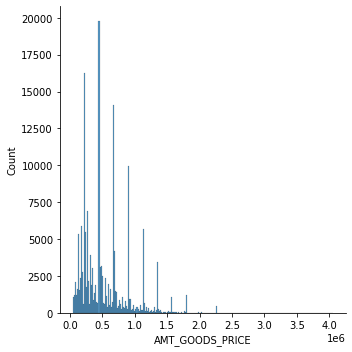

In [ ]:
# AMT_GOODS_PRICE  の分布
sns.displot(data=train, x="AMT_GOODS_PRICE")
plt.show()

In [ ]:
# AMT_GOODS_PRICEの値の種類を確認
len(train["AMT_GOODS_PRICE"].unique())

756

In [ ]:
# AMT_GOODS_PRICEの上位10個
train["AMT_GOODS_PRICE"].value_counts().head(10)

450000.0     14400
225000.0     14066
675000.0     13883
900000.0      8479
270000.0      6324
180000.0      5561
454500.0      5116
1125000.0     5017
135000.0      4649
315000.0      2925
Name: AMT_GOODS_PRICE, dtype: int64

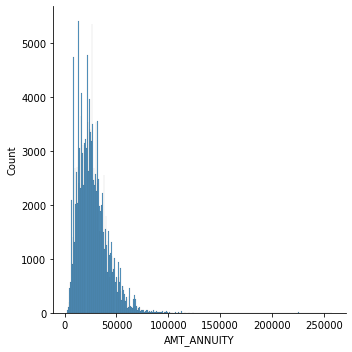

In [ ]:
# AMT_ANNUITYの分布
sns.displot(data=train, x="AMT_ANNUITY")
plt.show()

In [ ]:
# AMT_ANNUITYの値の種類を確認
len(train["AMT_ANNUITY"].unique())

12250

In [ ]:
# AMT_ANNUITYの上位10個
train["AMT_ANNUITY"].value_counts().head(10)

9000.0     3520
13500.0    3053
6750.0     1285
10125.0    1078
37800.0     882
26217.0     814
11250.0     803
20250.0     746
12375.0     736
31653.0     699
Name: AMT_ANNUITY, dtype: int64

##欠損値の変換

In [ ]:
# AMT_ANNUITYの欠損値を平均値で補完
train["AMT_ANNUITY"].fillna(train["AMT_ANNUITY"].mean(), inplace=True)
test["AMT_ANNUITY"].fillna(train["AMT_ANNUITY"].mean(), inplace=True)
train.isnull().sum()

NAME_CONTRACT_TYPE         0
AMT_INCOME_TOTAL           0
EXT_SOURCE_2             369
OWN_CAR_AGE           112992
ORGANIZATION_TYPE          0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE          163
TARGET                     0
dtype: int64

In [ ]:
# AMT_GOODS_PRICEの欠損値を平均値で補完
train["AMT_GOODS_PRICE"].fillna(train["AMT_GOODS_PRICE"].mean(), inplace=True)
test["AMT_GOODS_PRICE"].fillna(train["AMT_GOODS_PRICE"].mean(), inplace=True)
train.isnull().sum()

NAME_CONTRACT_TYPE         0
AMT_INCOME_TOTAL           0
EXT_SOURCE_2             369
OWN_CAR_AGE           112992
ORGANIZATION_TYPE          0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE            0
TARGET                     0
dtype: int64

In [ ]:
# EXT_SOURCE_2の欠損値を平均値で補完
train["EXT_SOURCE_2"].fillna(train["EXT_SOURCE_2"].mean(), inplace=True)
test["EXT_SOURCE_2"].fillna(train["EXT_SOURCE_2"].mean(), inplace=True)

train.isnull().sum()

NAME_CONTRACT_TYPE         0
AMT_INCOME_TOTAL           0
EXT_SOURCE_2               0
OWN_CAR_AGE           112992
ORGANIZATION_TYPE          0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE            0
TARGET                     0
dtype: int64

In [ ]:
# NAME_CONTRACT_TYPEの数値化（Label Encoding）
train["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)
test["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)

train.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET
0,0,112500.0,0.372591,NaN,School,755190.0,36328.5,675000.0,0
1,0,225000.0,0.449567,NaN,XNA,585000.0,16893.0,585000.0,0
2,0,54000.0,0.569503,NaN,Postal,334152.0,18256.5,270000.0,0
3,0,67500.0,0.105235,NaN,XNA,152820.0,8901.0,135000.0,0
4,0,157500.0,0.202490,NaN,Business Entity Type 3,271066.5,21546.0,234000.0,1


In [ ]:
# ORGANIZATION_TYPEの数値化（Count Encoding）
organization_ce = train["ORGANIZATION_TYPE"].value_counts()
train["ORGANIZATION_TYPE"] = train["ORGANIZATION_TYPE"].map(organization_ce)
test["ORGANIZATION_TYPE"] = test["ORGANIZATION_TYPE"].map(organization_ce)

train.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET
0,0,112500.0,0.372591,NaN,4991,755190.0,36328.5,675000.0,0
1,0,225000.0,0.449567,NaN,30898,585000.0,16893.0,585000.0,0
2,0,54000.0,0.569503,NaN,1185,334152.0,18256.5,270000.0,0
3,0,67500.0,0.105235,NaN,30898,152820.0,8901.0,135000.0,0
4,0,157500.0,0.202490,NaN,37943,271066.5,21546.0,234000.0,1


In [ ]:
# OWN_CAR_AGEの60以上の値（外れ値）を欠損値扱いする
train.loc[train["OWN_CAR_AGE"] >= 60, "OWN_CAR_AGE"] = np.nan
test.loc[test["OWN_CAR_AGE"] >= 60, "OWN_CAR_AGE"] = np.nan

# OWN_CAR_AGEをグループ分け
train["OWN_CAR_AGE"] = train["OWN_CAR_AGE"] // 10
test["OWN_CAR_AGE"] = test["OWN_CAR_AGE"] // 10

train["OWN_CAR_AGE"].unique()

array([nan,  0.,  2.,  1.,  3.,  4.,  5.])

In [ ]:
# OWN_CAR_AGEをOne Hot Encoding
train_car_age_ohe = pd.get_dummies(train["OWN_CAR_AGE"]).add_prefix("OWN_CAR_AGE_")
test_car_age_ohe = pd.get_dummies(test["OWN_CAR_AGE"]).add_prefix("OWN_CAR_AGE_")

train = pd.concat([train, train_car_age_ohe], axis=1)
test = pd.concat([test, test_car_age_ohe], axis=1)

train.drop('OWN_CAR_AGE', axis=1, inplace=True)
test.drop('OWN_CAR_AGE', axis=1, inplace=True)

train.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,ORGANIZATION_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,OWN_CAR_AGE_0.0,OWN_CAR_AGE_1.0,OWN_CAR_AGE_2.0,OWN_CAR_AGE_3.0,OWN_CAR_AGE_4.0,OWN_CAR_AGE_5.0
0,0,112500.0,0.372591,4991,755190.0,36328.5,675000.0,0,0,0,0,0,0,0
1,0,225000.0,0.449567,30898,585000.0,16893.0,585000.0,0,0,0,0,0,0,0
2,0,54000.0,0.569503,1185,334152.0,18256.5,270000.0,0,0,0,0,0,0,0
3,0,67500.0,0.105235,30898,152820.0,8901.0,135000.0,0,0,0,0,0,0,0
4,0,157500.0,0.202490,37943,271066.5,21546.0,234000.0,1,0,0,0,0,0,0


In [ ]:
# ライブラリの読み込み
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [ ]:
# 目的変数と説明変数に分割
X = train.drop("TARGET", axis=1).values
y = train["TARGET"].values
X_test = test.values

In [ ]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)

In [ ]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=0)

In [61]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lr_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}")

Train Score: 0.6700442428412354
Valid Score: 0.674327147029229


In [57]:
from sklearn.metrics import roc_auc_score

In [59]:
roc_auc_score(y_valid, lr_valid_pred)

0.674327147029229

In [ ]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, mlp_valid_pred)}")

Train Score: 0.7009532028269672
Valid Score: 0.6884866055193221


In [ ]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict_proba(X_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.7041796338257873
Valid Score: 0.6978683842972018


In [ ]:
# LGBMClassifier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=0)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

Train Score: 0.7639669414082699
Valid Score: 0.6996599522491029


In [ ]:
train_pred = (lr_train_pred + mlp_train_pred + lgb_train_pred + xgb_train_pred)/4
valid_pred = (lr_valid_pred + mlp_valid_pred + lgb_valid_pred + xgb_valid_pred)/4

print(f"Train Score: {roc_auc_score(y_train, train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, valid_pred)}")

Train Score: 0.7253865838637404
Valid Score: 0.6991990381367086


In [62]:
# テストデータに対する予測値の作成
pred = lgb.predict_proba(X_test)[:, 1]

In [63]:
# 予測結果を提出用のフォーマットに格納
sample_sub['TARGET'] = pred
sample_sub

,SK_ID_CURR,TARGET
0,171202,0.090155
1,171203,0.129314
2,171204,0.129314
3,171205,0.052917
4,171206,0.038349
...,...,...
61495,232697,0.037997
61496,232698,0.105069
61497,232699,0.121561
61498,232700,0.129314


In [65]:
# 提出用のcsvファイルを作成
sample_sub.to_csv('submission3.csv',index=False)